Dataframe head:
    #  Nationality  Sex  AnswerD  AnswerN  AnswerC  AnswerG  AnswerE  AnswerO  \
0  1            0    1        1        1        1        1        1        1   
1  2            0    0        0        1        0        0        0        1   
2  3            0    1        1        0        1        0        0        0   
3  4            0    1        0        1        0        0        0        0   
4  5            0    0        1        1        1        1        1        1   

   AnswerM  AnswerV  AnswerEg  AnswerMrt  AnswerOz  AnswerP  AnswerT  \
0        1        0         0          1         1        0        1   
1        0        0         1          1         0        0        0   
2        0        1         0          0         1        1        1   
3        1        0         1          1         0        1        0   
4        1        1         1          1         1        1        0   

   AnswerSum  
0         10  
1          4  
2          6  
3        

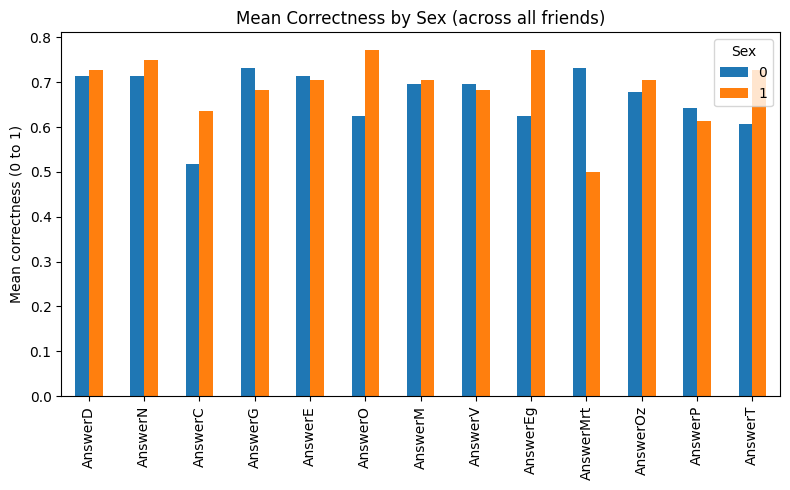

/tmp/ipykernel_3212/1236826288.py:50: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(distance, method='ward')



Correlation matrix of friends’ answers (reordered):
            AnswerMrt   AnswerC   AnswerT   AnswerV   AnswerD   AnswerE  \
AnswerMrt   1.000000 -0.079908  0.018364 -0.200185 -0.016607 -0.124613   
AnswerC    -0.079908  1.000000  0.399963  0.378654  0.448066  0.379708   
AnswerT     0.018364  0.399963  1.000000  0.294860  0.304662  0.425213   
AnswerV    -0.200185  0.378654  0.294860  1.000000  0.352501  0.476980   
AnswerD    -0.016607  0.448066  0.304662  0.352501  1.000000  0.534017   
AnswerE    -0.124613  0.379708  0.425213  0.476980  0.534017  1.000000   
AnswerP     0.056199  0.045602  0.324430  0.202872  0.260173  0.194908   
AnswerG     0.194908  0.246164  0.192602  0.334029  0.288605  0.222924   
AnswerOz    0.068520  0.203958  0.157928  0.298738  0.304345  0.334029   
AnswerM     0.176272  0.224796  0.221116  0.268943  0.223565  0.399154   
AnswerEg    0.023736  0.160284  0.112284  0.251987  0.400657  0.286379   
AnswerN     0.047120  0.199733  0.276738  0.176790  0.2227

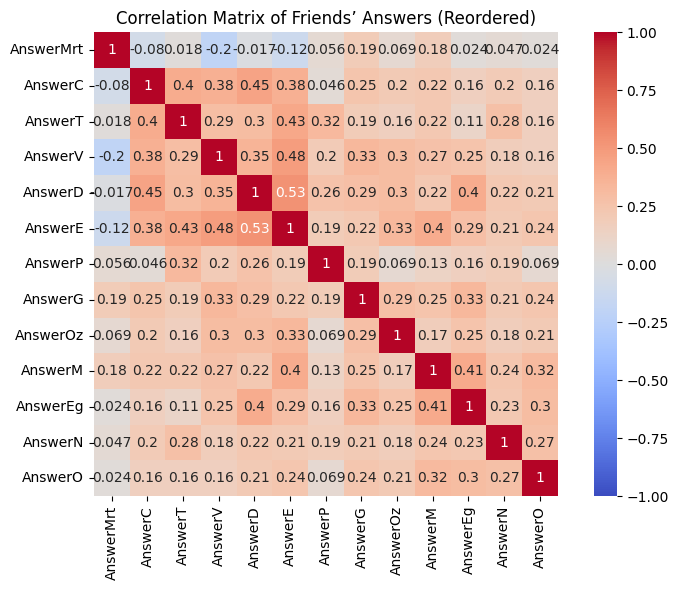


Correlation matrix for Sex = 1:
                 AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000e+00  0.117851  0.385758  0.129483  0.833788  0.276755   
AnswerN    1.178511e-01  1.000000  0.109109  0.056344  0.201319  0.313112   
AnswerC    3.857584e-01  0.109109  1.000000  0.193649  0.442452  0.266474   
AnswerG    1.294831e-01  0.056344  0.193649  1.000000  0.199313  0.095266   
AnswerE    8.337881e-01  0.201319  0.442452  0.199313  1.000000  0.362004   
AnswerO    2.767547e-01  0.313112  0.266474  0.095266  0.362004  1.000000   
AnswerM    2.745400e-01  0.431398  0.131794  0.092365  0.344913  0.480870   
AnswerV    5.677336e-01  0.056344  0.497955  0.161905  0.627108  0.211702   
AnswerEg   3.985267e-01  0.313112  0.153735  0.328139  0.362004  0.352941   
AnswerMrt  5.665583e-18  0.052486 -0.188982  0.292770 -0.049814  0.108465   
AnswerOz   2.745400e-01  0.086280  0.028242  0.092365  0.344913  0.124270   
AnswerP    2.477202e-01  0.080845  0.07938

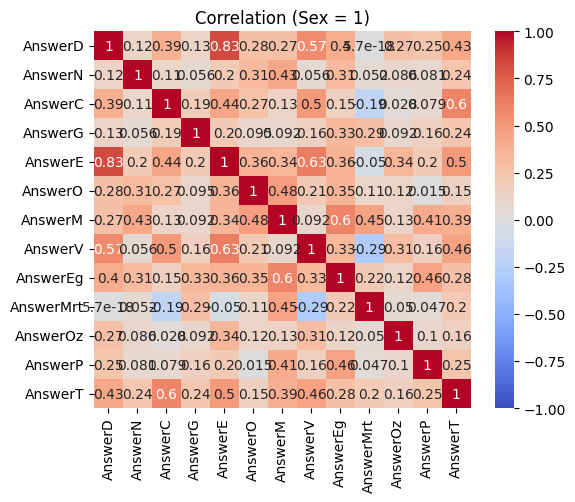


Correlation matrix for Sex = 0:
             AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000  0.300000  0.497247  0.420801  0.300000  0.163299   
AnswerN    0.300000  1.000000  0.259924  0.331540  0.212500  0.244949   
AnswerC    0.497247  0.259924  1.000000  0.304063  0.339032  0.064591   
AnswerG    0.420801  0.331540  0.304063  1.000000  0.242279  0.364405   
AnswerE    0.300000  0.212500  0.339032  0.242279  1.000000  0.163299   
AnswerO    0.163299  0.244949  0.064591  0.364405  0.163299  1.000000   
AnswerM    0.184219  0.098250  0.295626  0.389946  0.442126  0.210580   
AnswerV    0.184219  0.270188  0.295626  0.477645  0.356157  0.130359   
AnswerEg   0.408248  0.163299  0.138409  0.364405  0.244949  0.238095   
AnswerMrt -0.025503  0.063758  0.061966  0.089431 -0.204025  0.031235   
AnswerOz   0.326464  0.241825  0.330679  0.447129  0.326464  0.256685   
AnswerP    0.271058  0.271058  0.026637  0.222412  0.188562  0.115470   
AnswerT    0.2196

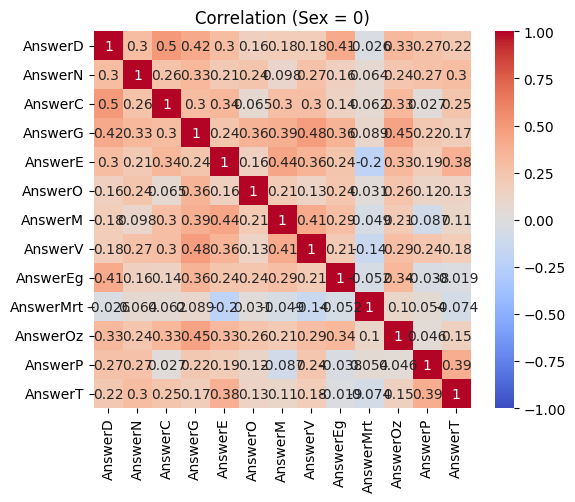


Correlation matrix for Nationality = 0:
             AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000  0.174964  0.552329  0.145144  0.738680  0.171047   
AnswerN    0.174964  1.000000  0.415604  0.299392  0.418251  0.347446   
AnswerC    0.552329  0.415604  1.000000  0.198060  0.543671  0.280848   
AnswerG    0.145144  0.299392  0.198060  1.000000  0.289404  0.216841   
AnswerE    0.738680  0.418251  0.543671  0.289404  1.000000  0.359025   
AnswerO    0.171047  0.347446  0.280848  0.216841  0.359025  1.000000   
AnswerM    0.272166  0.428571  0.238751  0.112272  0.418251  0.449636   
AnswerV    0.371829  0.327178  0.507389  0.284928  0.459250  0.280848   
AnswerEg   0.287537  0.261279  0.128679  0.124990  0.299333  0.102389   
AnswerMrt -0.121135 -0.062941 -0.165298  0.257926 -0.072107 -0.150506   
AnswerOz   0.398694  0.267182  0.330193  0.141193  0.429237  0.189805   
AnswerP    0.127294  0.178174  0.132344  0.140028  0.323197  0.019118   
AnswerT  

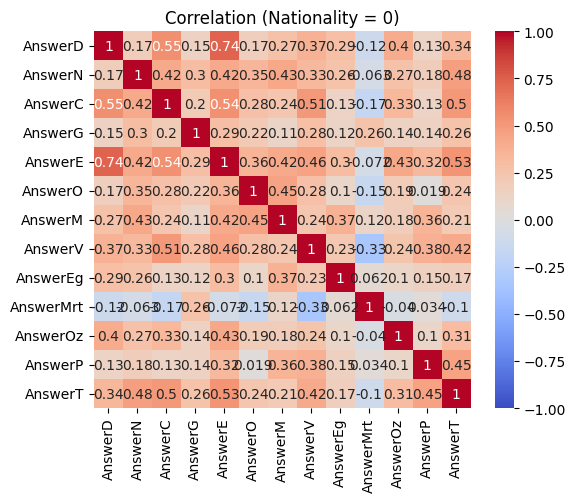


Correlation matrix for Nationality = 1:
             AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000  0.275344  0.344584  0.442760  0.313985  0.245942   
AnswerN    0.275344  1.000000 -0.026415  0.093950 -0.072350  0.235407   
AnswerC    0.344584 -0.026415  1.000000  0.301287  0.210090  0.053125   
AnswerG    0.442760  0.093950  0.301287  1.000000  0.125480  0.287449   
AnswerE    0.313985 -0.072350  0.210090  0.125480  1.000000  0.181032   
AnswerO    0.245942  0.235407  0.053125  0.287449  0.181032  1.000000   
AnswerM    0.174964  0.040876  0.211014  0.407945  0.389819  0.206805   
AnswerV    0.356348 -0.046829  0.261892  0.387567  0.458664  0.123613   
AnswerEg   0.524055  0.256606  0.188312  0.576855  0.404617  0.385159   
AnswerMrt  0.089087  0.163903  0.006715  0.125389 -0.197145  0.185419   
AnswerOz   0.206349  0.066750  0.075378  0.442760  0.206456  0.245942   
AnswerP    0.398694  0.189805 -0.040826  0.248334  0.026499  0.133953   
AnswerT  

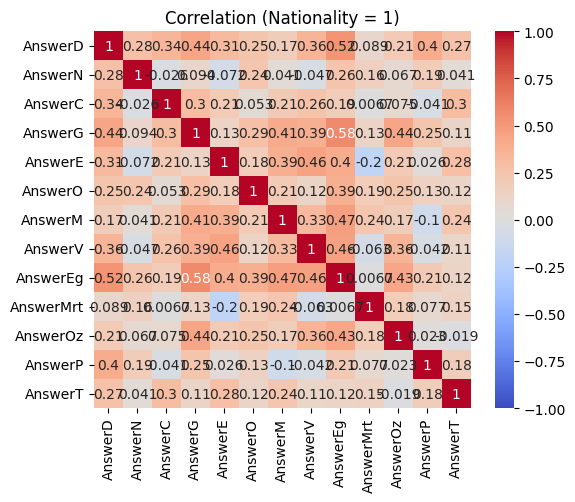


Mean of AnswerSum by Nationality and Sex:
 Nationality  Sex
0            0      8.640000
             1      8.720000
1            0      8.741935
             1      9.315789
Name: AnswerSum, dtype: float64

Correlation of each friend’s correctness with AnswerSum:
 AnswerD      0.658224
AnswerN      0.496934
AnswerC      0.554395
AnswerG      0.580749
AnswerE      0.663931
AnswerO      0.485725
AnswerM      0.587544
AnswerV      0.580938
AnswerEg     0.567337
AnswerMrt    0.178116
AnswerOz     0.512929
AnswerP      0.425681
AnswerT      0.570239
Name: AnswerSum, dtype: float64


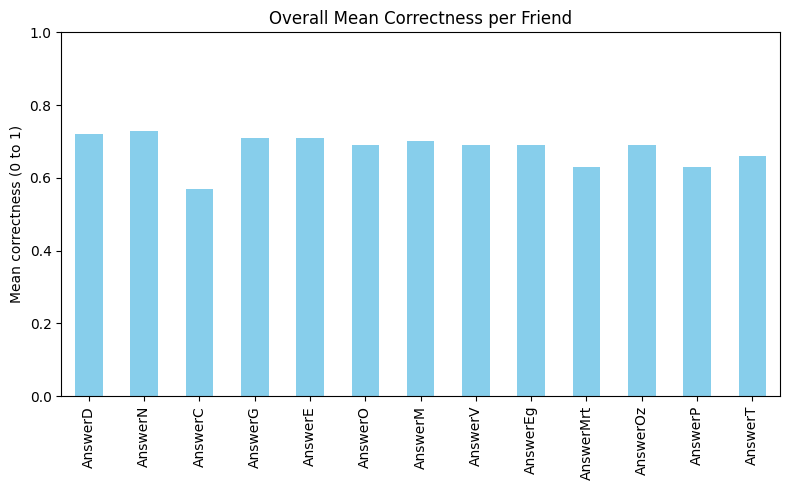

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# ========== 1. IMPORT DATA ==========
# Make sure Data.xlsx is in the same directory or provide the full path
df = pd.read_excel('Data.xlsx')

# Preview the data (optional)
print("Dataframe head:\n", df.head())


# ========== 2. DISTRIBUTION ANALYSIS ==========

# List of friend answer columns (i.e., correctness indicators)
friend_cols = ['Data', 'Niko', 'Chertko', 'Gvine',
               'Erekle', 'Oto', 'Maro', 'Vaughn', 'Egnata','Marta','OtarZ','Parna','Toto','Ila']

# (A) Distribution of correct answers by Nationality
nationality_dist = df.groupby('Nationality')[friend_cols].mean()
print("\nMean correctness by Nationality:\n", nationality_dist)

# (B) Distribution of correct answers by Sex
sex_dist = df.groupby('Sex')[friend_cols].mean()
print("\nMean correctness by Sex:\n", sex_dist)

# (C) Distribution by Nationality *and* Sex
nat_sex_dist = df.groupby(['Nationality', 'Sex'])[friend_cols].mean()
print("\nMean correctness by Nationality and Sex:\n", nat_sex_dist)

# Optionally visualize these distributions using bar plots or similar
# Example: mean correctness per friend by Sex
fig, ax = plt.subplots(figsize=(8, 5))
sex_dist.T.plot.bar(ax=ax)
ax.set_title('Mean Correctness by Sex (across all friends)')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# ========== 3. CORRELATION MATRIX OF FRIENDS’ ANSWERS ==========

# Compute correlation matrix among friends
corr_matrix = df[friend_cols].corr()

# To reorder so that the largest correlations appear in the top-left corner,
# we can use hierarchical clustering on the correlation matrix
distance = 1 - corr_matrix
# Perform hierarchical clustering
link = linkage(distance, method='ward')
# Get the order of the leaves
idx = leaves_list(link)
# Reindex the correlation matrix
reordered_corr = corr_matrix.iloc[idx, idx]

print("\nCorrelation matrix of friends’ answers (reordered):\n", reordered_corr)

# Visualize this reordered correlation matrix with a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(reordered_corr, 
            cmap='coolwarm',  # red for high corr, blue for low corr
            annot=True,       # show numerical correlation values
            vmin=-1, vmax=1,
            square=True,
            ax=ax)
ax.set_title('Correlation Matrix of Friends’ Answers (Reordered)')
plt.tight_layout()
plt.show()

# ========== 4. CORRELATIONS BY SUBGROUP (SEX, NATIONALITY) ==========

# Here we compute correlation matrices within each subgroup of Sex and Nationality.
# This can be quite a few subgroups if you have many categories of Nationality.

# Subgroup correlation by Sex
unique_sex = df['Sex'].unique()
sex_corr_dict = {}
for s in unique_sex:
    subset = df[df['Sex'] == s]
    # Compute correlation among friend_cols in this subset
    sex_corr = subset[friend_cols].corr()
    sex_corr_dict[s] = sex_corr
    print(f"\nCorrelation matrix for Sex = {s}:\n", sex_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(sex_corr, 
                cmap='coolwarm', 
                annot=True, 
                vmin=-1, vmax=1, 
                square=True, 
                ax=ax)
    ax.set_title(f'Correlation (Sex = {s})')
    plt.tight_layout()
    plt.show()

# Subgroup correlation by Nationality
unique_nationalities = df['Nationality'].unique()
nat_corr_dict = {}
for nat in unique_nationalities:
    subset = df[df['Nationality'] == nat]
    # Compute correlation among friend_cols in this subset
    nat_corr = subset[friend_cols].corr()
    nat_corr_dict[nat] = nat_corr
    print(f"\nCorrelation matrix for Nationality = {nat}:\n", nat_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(nat_corr, 
                cmap='coolwarm', 
                annot=True, 
                vmin=-1, vmax=1, 
                square=True, 
                ax=ax)
    ax.set_title(f'Correlation (Nationality = {nat})')
    plt.tight_layout()
    plt.show()

# ========== 5. ADDITIONAL IDEAS FOR ANALYSIS ==========

# - You could look at the distribution of AnswerSum by Nationality and Sex:
sum_dist = df.groupby(['Nationality','Sex'])['AnswerSum'].mean()
print("\nMean of AnswerSum by Nationality and Sex:\n", sum_dist)

# - You could check the correlation of each friend’s correctness with AnswerSum:
friend_sum_corr = df[friend_cols + ['AnswerSum']].corr()['AnswerSum'].drop('AnswerSum')
print("\nCorrelation of each friend’s correctness with AnswerSum:\n", friend_sum_corr)

# - You could also visually compare how often each friend was correct across all observations:
mean_correctness_per_friend = df[friend_cols].mean()
fig, ax = plt.subplots(figsize=(8, 5))
mean_correctness_per_friend.plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylim([0, 1])
ax.set_title('Overall Mean Correctness per Friend')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# =======================================================
# Feel free to modify or expand these plots for your needs.
# =======================================================

Dataframe head:
    #  Nationality  Sex  AnswerD  AnswerN  AnswerC  AnswerG  AnswerE  AnswerO  \
0  1            0    1        1        1        1        1        1        1   
1  2            0    0        0        1        0        0        0        1   
2  3            0    1        1        0        1        0        0        0   
3  4            0    1        0        1        0        0        0        0   
4  5            0    0        1        1        1        1        1        1   

   AnswerM  AnswerV  AnswerEg  AnswerMrt  AnswerOz  AnswerP  AnswerT  \
0        1        0         0          1         1        0        1   
1        0        0         1          1         0        0        0   
2        0        1         0          0         1        1        1   
3        1        0         1          1         0        1        0   
4        1        1         1          1         1        1        0   

   AnswerSum  
0         10  
1          4  
2          6  
3        

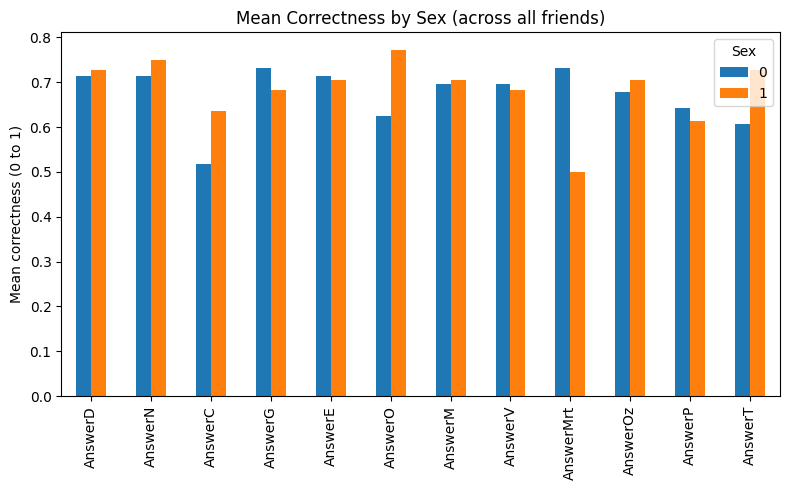

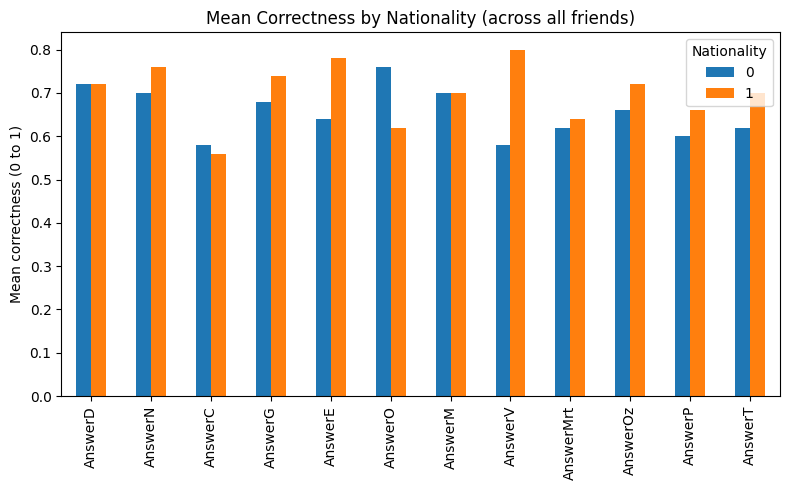

/tmp/ipykernel_3212/4172576386.py:57: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(distance, method='ward')



Correlation matrix of friends’ answers (reordered):
            AnswerMrt   AnswerV   AnswerD   AnswerE   AnswerC   AnswerT  \
AnswerMrt   1.000000 -0.200185 -0.016607 -0.124613 -0.079908  0.018364   
AnswerV    -0.200185  1.000000  0.352501  0.476980  0.378654  0.294860   
AnswerD    -0.016607  0.352501  1.000000  0.534017  0.448066  0.304662   
AnswerE    -0.124613  0.476980  0.534017  1.000000  0.379708  0.425213   
AnswerC    -0.079908  0.378654  0.448066  0.379708  1.000000  0.399963   
AnswerT     0.018364  0.294860  0.304662  0.425213  0.399963  1.000000   
AnswerP     0.056199  0.202872  0.260173  0.194908  0.045602  0.324430   
AnswerG     0.194908  0.334029  0.288605  0.222924  0.246164  0.192602   
AnswerOz    0.068520  0.298738  0.304345  0.334029  0.203958  0.157928   
AnswerN     0.047120  0.176790  0.222738  0.206997  0.199733  0.276738   
AnswerO     0.023736  0.158485  0.208033  0.238728  0.160284  0.157928   
AnswerM     0.176272  0.268943  0.223565  0.399154  0.2247

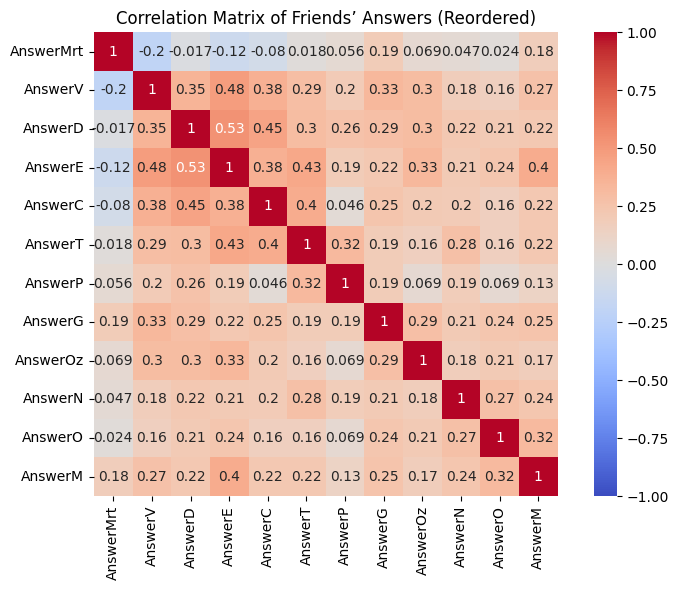


Correlation matrix for Sex = 1:
                 AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000e+00  0.117851  0.385758  0.129483  0.833788  0.276755   
AnswerN    1.178511e-01  1.000000  0.109109  0.056344  0.201319  0.313112   
AnswerC    3.857584e-01  0.109109  1.000000  0.193649  0.442452  0.266474   
AnswerG    1.294831e-01  0.056344  0.193649  1.000000  0.199313  0.095266   
AnswerE    8.337881e-01  0.201319  0.442452  0.199313  1.000000  0.362004   
AnswerO    2.767547e-01  0.313112  0.266474  0.095266  0.362004  1.000000   
AnswerM    2.745400e-01  0.431398  0.131794  0.092365  0.344913  0.480870   
AnswerV    5.677336e-01  0.056344  0.497955  0.161905  0.627108  0.211702   
AnswerMrt  5.665583e-18  0.052486 -0.188982  0.292770 -0.049814  0.108465   
AnswerOz   2.745400e-01  0.086280  0.028242  0.092365  0.344913  0.124270   
AnswerP    2.477202e-01  0.080845  0.079388  0.159429  0.202283  0.015188   
AnswerT    4.270833e-01  0.235702  0.59792

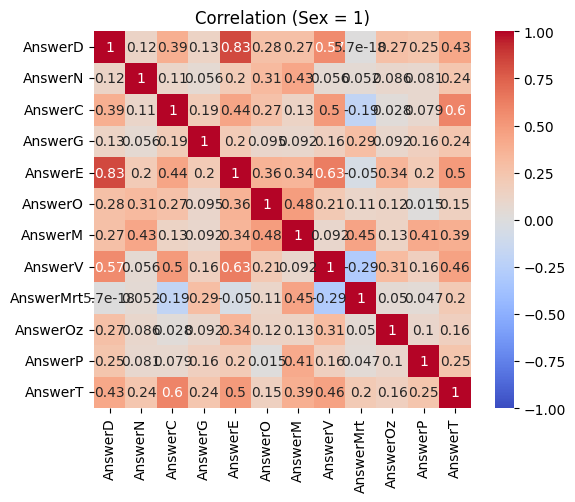


Correlation matrix for Sex = 0:
             AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000  0.300000  0.497247  0.420801  0.300000  0.163299   
AnswerN    0.300000  1.000000  0.259924  0.331540  0.212500  0.244949   
AnswerC    0.497247  0.259924  1.000000  0.304063  0.339032  0.064591   
AnswerG    0.420801  0.331540  0.304063  1.000000  0.242279  0.364405   
AnswerE    0.300000  0.212500  0.339032  0.242279  1.000000  0.163299   
AnswerO    0.163299  0.244949  0.064591  0.364405  0.163299  1.000000   
AnswerM    0.184219  0.098250  0.295626  0.389946  0.442126  0.210580   
AnswerV    0.184219  0.270188  0.295626  0.477645  0.356157  0.130359   
AnswerMrt -0.025503  0.063758  0.061966  0.089431 -0.204025  0.031235   
AnswerOz   0.326464  0.241825  0.330679  0.447129  0.326464  0.256685   
AnswerP    0.271058  0.271058  0.026637  0.222412  0.188562  0.115470   
AnswerT    0.219686  0.300623  0.248269  0.173978  0.381560  0.132170   

            Answ

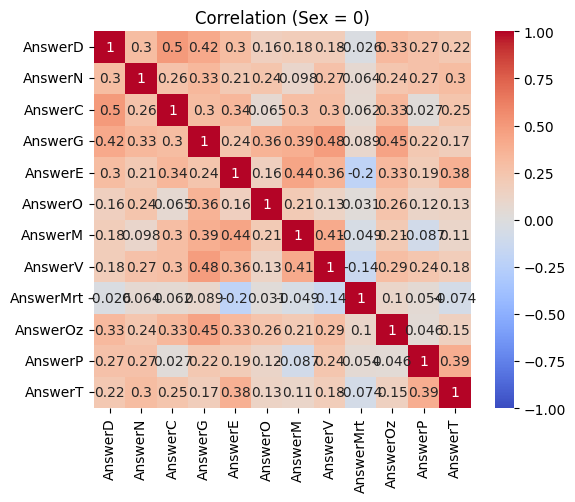


Correlation matrix for Nationality = 0:
             AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000  0.174964  0.552329  0.145144  0.738680  0.171047   
AnswerN    0.174964  1.000000  0.415604  0.299392  0.418251  0.347446   
AnswerC    0.552329  0.415604  1.000000  0.198060  0.543671  0.280848   
AnswerG    0.145144  0.299392  0.198060  1.000000  0.289404  0.216841   
AnswerE    0.738680  0.418251  0.543671  0.289404  1.000000  0.359025   
AnswerO    0.171047  0.347446  0.280848  0.216841  0.359025  1.000000   
AnswerM    0.272166  0.428571  0.238751  0.112272  0.418251  0.449636   
AnswerV    0.371829  0.327178  0.507389  0.284928  0.459250  0.280848   
AnswerMrt -0.121135 -0.062941 -0.165298  0.257926 -0.072107 -0.150506   
AnswerOz   0.398694  0.267182  0.330193  0.141193  0.429237  0.189805   
AnswerP    0.127294  0.178174  0.132344  0.140028  0.323197  0.019118   
AnswerT    0.337711  0.476550  0.502574  0.257926  0.528788  0.235407   

        

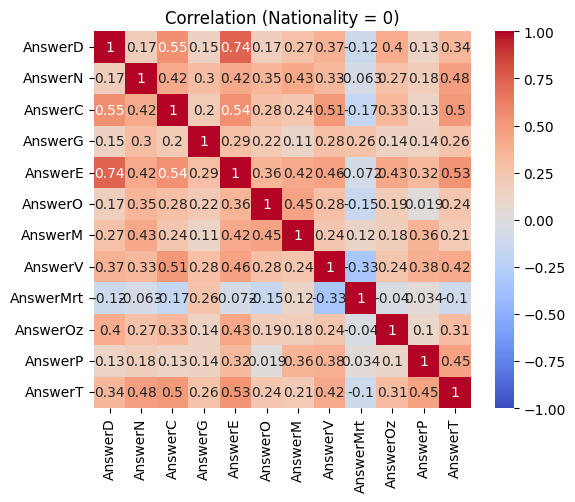


Correlation matrix for Nationality = 1:
             AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO  \
AnswerD    1.000000  0.275344  0.344584  0.442760  0.313985  0.245942   
AnswerN    0.275344  1.000000 -0.026415  0.093950 -0.072350  0.235407   
AnswerC    0.344584 -0.026415  1.000000  0.301287  0.210090  0.053125   
AnswerG    0.442760  0.093950  0.301287  1.000000  0.125480  0.287449   
AnswerE    0.313985 -0.072350  0.210090  0.125480  1.000000  0.181032   
AnswerO    0.245942  0.235407  0.053125  0.287449  0.181032  1.000000   
AnswerM    0.174964  0.040876  0.211014  0.407945  0.389819  0.206805   
AnswerV    0.356348 -0.046829  0.261892  0.387567  0.458664  0.123613   
AnswerMrt  0.089087  0.163903  0.006715  0.125389 -0.197145  0.185419   
AnswerOz   0.206349  0.066750  0.075378  0.442760  0.206456  0.245942   
AnswerP    0.398694  0.189805 -0.040826  0.248334  0.026499  0.133953   
AnswerT    0.272166  0.040876  0.298936  0.109449  0.284463  0.116890   

        

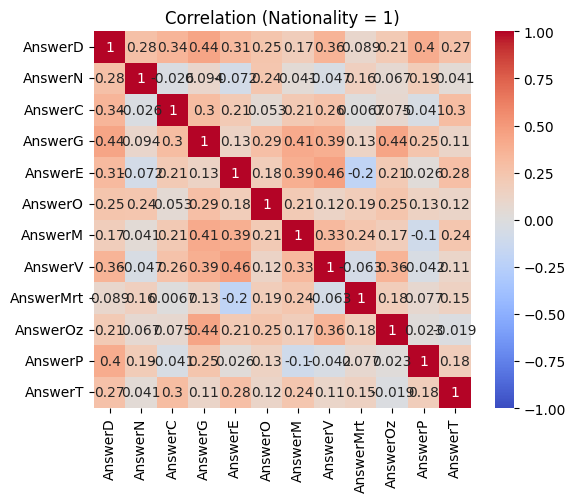


Mean of AnswerSum by Nationality and Sex:
 Nationality  Sex
0            0      8.640000
             1      8.720000
1            0      8.741935
             1      9.315789
Name: AnswerSum, dtype: float64

Correlation of each friend’s correctness with AnswerSum:
 AnswerD      0.658224
AnswerN      0.496934
AnswerC      0.554395
AnswerG      0.580749
AnswerE      0.663931
AnswerO      0.485725
AnswerM      0.587544
AnswerV      0.580938
AnswerMrt    0.178116
AnswerOz     0.512929
AnswerP      0.425681
AnswerT      0.570239
Name: AnswerSum, dtype: float64


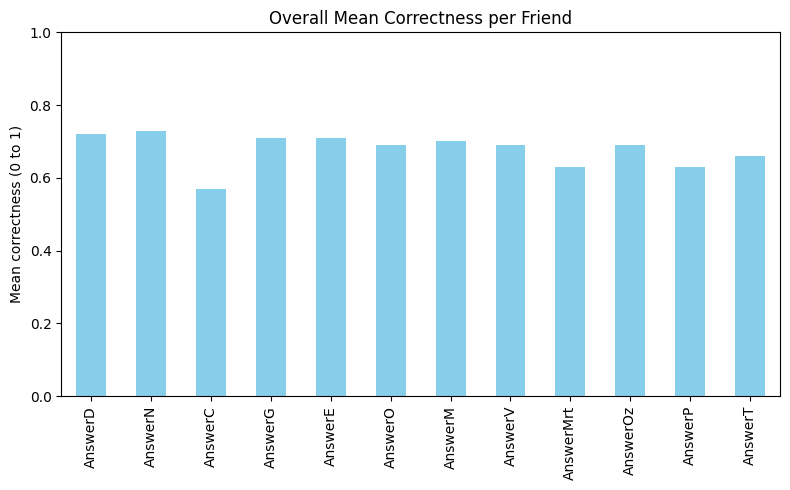

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# ========== 1. IMPORT DATA ==========
# Make sure Data.xlsx is in the same directory or provide the full path
df = pd.read_excel('Data.xlsx')

# Preview the data (optional)
print("Dataframe head:\n", df.head())

# ========== 2. DISTRIBUTION ANALYSIS ==========

# List of friend answer columns (i.e., correctness indicators)
friend_cols = ['AnswerD', 'AnswerN', 'AnswerC', 'AnswerG',
               'AnswerE', 'AnswerO', 'AnswerM', 'AnswerV','AnswerMrt','AnswerOz','AnswerP','AnswerT']

# (A) Distribution of correct answers by Nationality
nationality_dist = df.groupby('Nationality')[friend_cols].mean()
print("\nMean correctness by Nationality:\n", nationality_dist)

# (B) Distribution of correct answers by Sex
sex_dist = df.groupby('Sex')[friend_cols].mean()
print("\nMean correctness by Sex:\n", sex_dist)

# (C) Distribution by Nationality *and* Sex
nat_sex_dist = df.groupby(['Nationality', 'Sex'])[friend_cols].mean()
print("\nMean correctness by Nationality and Sex:\n", nat_sex_dist)

# (D) Visualize mean correctness per friend by Sex
fig, ax = plt.subplots(figsize=(8, 5))
sex_dist.T.plot.bar(ax=ax)  # .T transposes so that each friend is a series
ax.set_title('Mean Correctness by Sex (across all friends)')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# (E) Visualize mean correctness per friend by Nationality
fig, ax = plt.subplots(figsize=(8, 5))
nationality_dist.T.plot.bar(ax=ax)
ax.set_title('Mean Correctness by Nationality (across all friends)')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# ========== 3. CORRELATION MATRIX OF FRIENDS’ ANSWERS ==========

# Compute correlation matrix among friends
corr_matrix = df[friend_cols].corr()

# To reorder so that the largest correlations appear in the top-left corner,
# we can use hierarchical clustering on the correlation matrix
distance = 1 - corr_matrix
# Perform hierarchical clustering
link = linkage(distance, method='ward')
# Get the order of the leaves
idx = leaves_list(link)
# Reindex the correlation matrix
reordered_corr = corr_matrix.iloc[idx, idx]

print("\nCorrelation matrix of friends’ answers (reordered):\n", reordered_corr)

# Visualize this reordered correlation matrix with a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    reordered_corr, 
    cmap='coolwarm',  # red for high corr, blue for low corr
    annot=True,       # show numerical correlation values
    vmin=-1, vmax=1,
    square=True,
    ax=ax
)
ax.set_title('Correlation Matrix of Friends’ Answers (Reordered)')
plt.tight_layout()
plt.show()

# ========== 4. CORRELATIONS BY SUBGROUP (SEX, NATIONALITY) ==========

# Subgroup correlation by Sex
unique_sex = df['Sex'].unique()
sex_corr_dict = {}
for s in unique_sex:
    subset = df[df['Sex'] == s]
    # Compute correlation among friend_cols in this subset
    sex_corr = subset[friend_cols].corr()
    sex_corr_dict[s] = sex_corr
    print(f"\nCorrelation matrix for Sex = {s}:\n", sex_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(
        sex_corr,
        cmap='coolwarm', 
        annot=True, 
        vmin=-1, vmax=1, 
        square=True, 
        ax=ax
    )
    ax.set_title(f'Correlation (Sex = {s})')
    plt.tight_layout()
    plt.show()

# Subgroup correlation by Nationality
unique_nationalities = df['Nationality'].unique()
nat_corr_dict = {}
for nat in unique_nationalities:
    subset = df[df['Nationality'] == nat]
    # Compute correlation among friend_cols in this subset
    nat_corr = subset[friend_cols].corr()
    nat_corr_dict[nat] = nat_corr
    print(f"\nCorrelation matrix for Nationality = {nat}:\n", nat_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(
        nat_corr, 
        cmap='coolwarm', 
        annot=True, 
        vmin=-1, vmax=1, 
        square=True, 
        ax=ax
    )
    ax.set_title(f'Correlation (Nationality = {nat})')
    plt.tight_layout()
    plt.show()

# ========== 5. ADDITIONAL IDEAS FOR ANALYSIS ==========

# - You could look at the distribution of AnswerSum by Nationality and Sex:
sum_dist = df.groupby(['Nationality','Sex'])['AnswerSum'].mean()
print("\nMean of AnswerSum by Nationality and Sex:\n", sum_dist)

# - You could check the correlation of each friend’s correctness with AnswerSum:
friend_sum_corr = df[friend_cols + ['AnswerSum']].corr()['AnswerSum'].drop('AnswerSum')
print("\nCorrelation of each friend’s correctness with AnswerSum:\n", friend_sum_corr)

# - You could also visually compare how often each friend was correct across all observations:
mean_correctness_per_friend = df[friend_cols].mean()
fig, ax = plt.subplots(figsize=(8, 5))
mean_correctness_per_friend.plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylim([0, 1])
ax.set_title('Overall Mean Correctness per Friend')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()